<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [159]:
movies = pd.read_csv('imdb_1000.csv')
movies.head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Check the number of rows and columns.

In [4]:
movies.shape

(979, 6)

In [ ]:
# 979 rows
# 6 columns

#### Check the data type of each column.

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [12]:
movies['duration'].mean()

120.97957099080695

In [ ]:
# Answer: 120.98

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [11]:
movies.sort_values('duration', ascending = True)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

In [27]:
#calculate number number of bins wiht Sturge's rule
import math
K = 1 + (3.22 * np.log(979))
print(K)

23.174631888948245


Text(0.5, 1.0, 'Movie Durations')

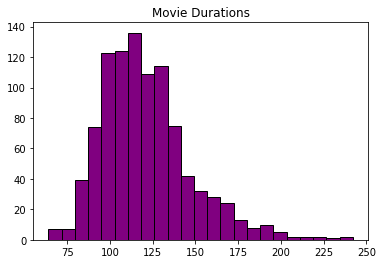

In [29]:
plt.hist(movies['duration'], color = 'purple', edgecolor = 'black', bins = 23)
# plt.xlim(-5, 5)
# plt.ylim(0, 100)
plt.title('Movie Durations')

#### Use a box plot to display that same data.

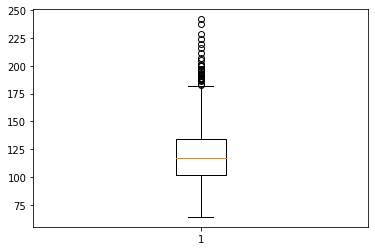

In [35]:
plt.boxplot(movies['duration']);

## Intermediate level

#### Count how many movies have each of the content ratings.

In [36]:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

In [38]:
import seaborn as sns

C:\Users\jason\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


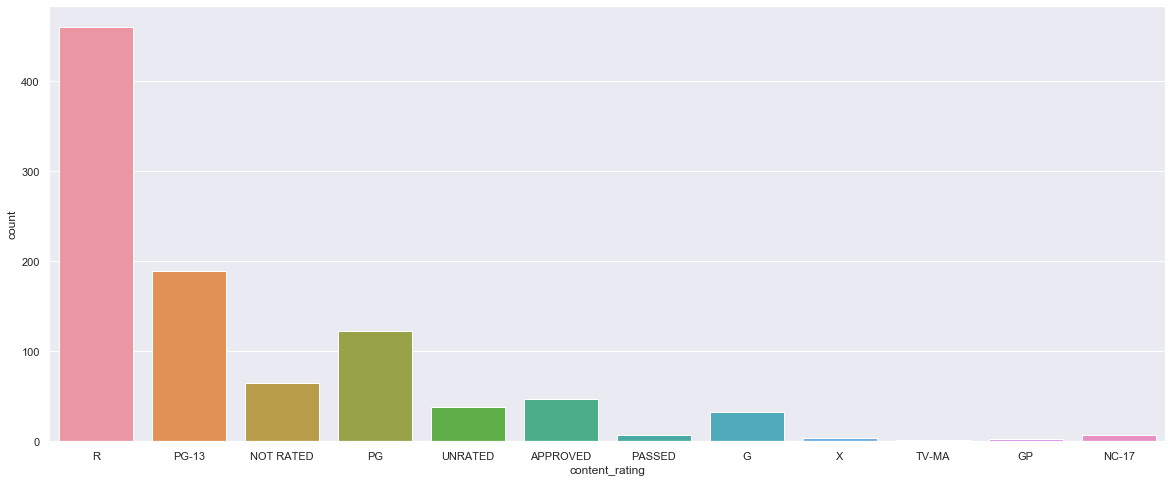

In [48]:
sns.countplot(data = movies
            ,x = 'content_rating')

sns.set(rc = {'figure.figsize':(20,8)})

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [52]:
movies.loc[(movies['content_rating']=='NOT RATED')|
          (movies['content_rating']=='APPROVED')|
          (movies['content_rating']=='PASSED')|
          (movies['content_rating']=='GP'), 'content_rating'] = "UNRATED"

In [53]:
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [54]:
movies.loc[(movies['content_rating']=='X')|
          (movies['content_rating']=='TV-MA'), 'content_rating'] = "NC-17"

In [55]:
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [57]:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [58]:
movies['content_rating'] = movies['content_rating'].fillna('no rating')

In [59]:
movies['content_rating'].value_counts()

R            460
PG-13        189
UNRATED      160
PG           123
G             32
NC-17         12
no rating      3
Name: content_rating, dtype: int64

In [60]:
movies.isna().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [61]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [64]:
#movies equal to or over 2 hours
movies.loc[movies['duration']>=120].mean()
#average star rating = 7.95

star_rating      7.948899
duration       142.458150
dtype: float64

In [65]:
# movies less than 2 hours
movies.loc[movies['duration']<120].mean()
# average star rating = 7.84

star_rating      7.838667
duration       102.405714
dtype: float64

#### Use a visualization to detect whether there is a relationship between duration and star rating.

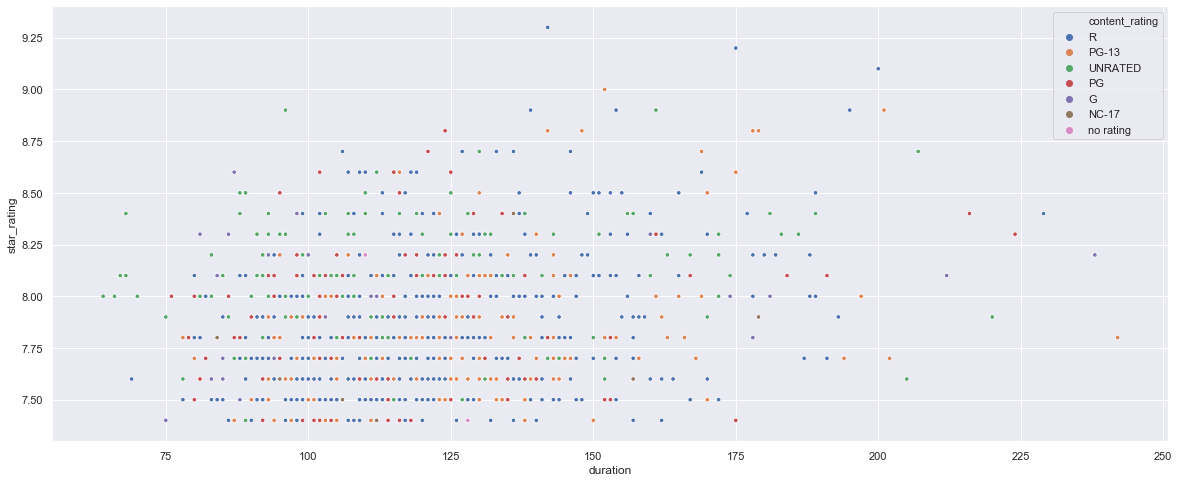

In [76]:
g = sns.scatterplot(x = 'duration', y = 'star_rating', hue='content_rating',data = movies, s = 20);


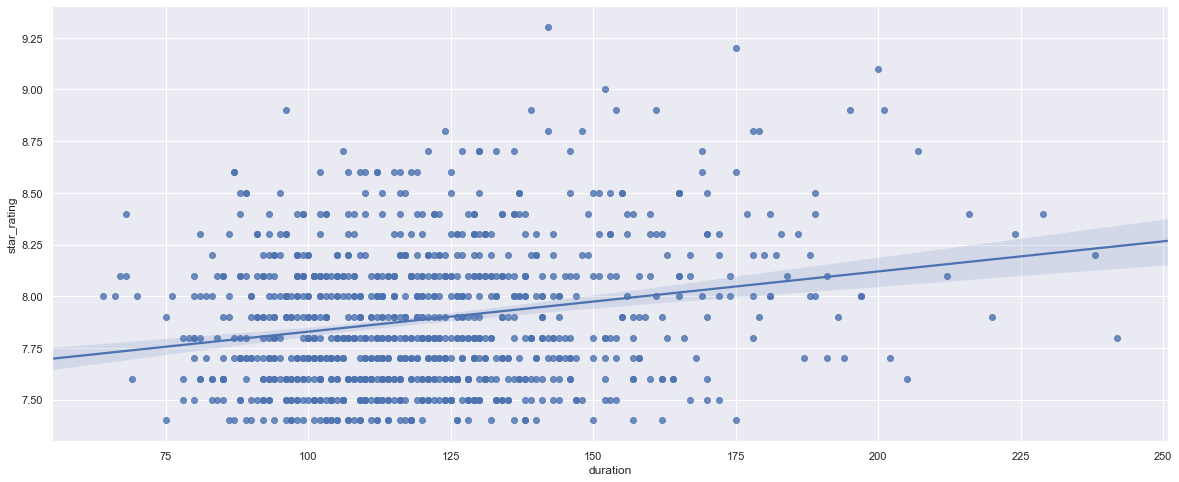

In [77]:
sns.regplot(x = 'duration', y = 'star_rating', data = movies)

#### Calculate the average duration for each genre.

In [78]:
movies.groupby(by = 'genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

In [79]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Visualize the relationship between content rating and duration.

In [84]:
df_content_rating = movies.groupby(by = 'content_rating')['duration'].mean().sort_values()
print(df_content_rating)

content_rating
G            112.343750
PG           115.300813
NC-17        116.250000
UNRATED      116.475000
R            122.163043
PG-13        127.195767
no rating    132.000000
Name: duration, dtype: float64


Text(0.5, 1.0, 'Average duration for different genres')

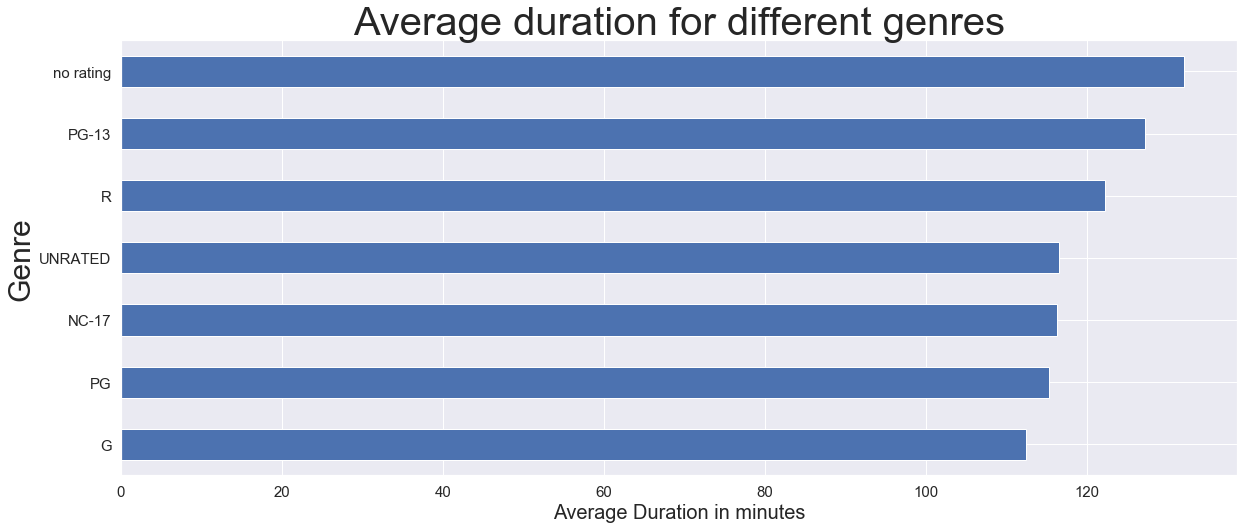

In [91]:
df_content_rating.plot(kind="barh", fontsize=15)
plt.xlabel('Average Duration in minutes', size = 20)
plt.ylabel('Genre', size = 30)
plt.title('Average duration for different genres', size = 40)

Text(0, 0.5, 'Duration in minutes')

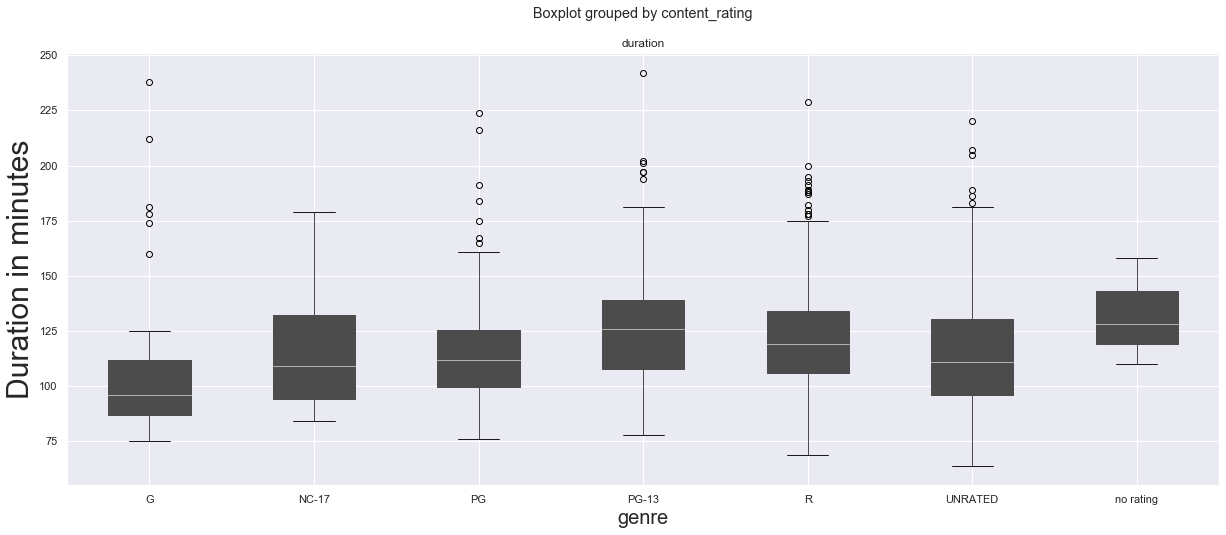

In [103]:

box = movies.boxplot(column='duration', by='content_rating', patch_artist=True)
plt.xlabel('genre', size = 20)
plt.ylabel('Duration in minutes', size = 30)



#### Determine the top rated movie (by star rating) for each genre.

In [123]:
movies.groupby(by = 'genre')['title', 'star_rating'].max().reset_index().sort_values(['star_rating'], ascending=False)

C:\Users\jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,genre,title,star_rating
5,Crime,Zodiac,9.3
0,Action,Yojimbo,9.0
1,Adventure,True Grit,8.9
3,Biography,Walk the Line,8.9
6,Drama,Zulu,8.9
15,Western,Unforgiven,8.9
2,Animation,Wreck-It Ralph,8.6
4,Comedy,Zombieland,8.6
11,Horror,[Rec],8.6
12,Mystery,Vertigo,8.6


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [130]:
duplicateRowsDF = movies['title'].duplicated(keep = False)
movies[duplicateRowsDF]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,no rating,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [ ]:
# THe Girl with the Dragon TAttoo: Not duplicates (one movie is from 2009 and the other is from 2011)
# True Grit: Not duplicates( one movie from 1969 and th eother is from 2010)
# Dracula: Not duplicates (one ovie is from 1931 and the other is from 1992)
# Les Miserables: Not duplicates (one movie is from 2012 and the other is from 1998)

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [150]:
movies['genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [ ]:
genre_list = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery' ]

In [156]:
movies_filter_1= movies[movies['genre'].isin(genre_list)]

In [157]:
movies_filter_1 

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [158]:
movies_filter_1.groupby(by = 'genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [183]:
movies_count_over_10 = movies['genre'].value_counts()>=10

In [192]:
Z = movies_count_over_10[movies_count_over_10]

In [193]:
# value_counts convert index to a list
#genre_list = Z.tolist()
genre_list = Z.index.tolist()

In [194]:
print(genre_list)
# 'Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery' ]

['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']


In [195]:
movies_filter = movies['genre'].isin(genre_list)

In [196]:
movies[movies_filter].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [172]:
bool_series = movies.genre.value_counts()>=10

In [176]:
movies.groupby(by = 'genre').star_rating.mean()[bool_series]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Calculate the average star rating for each genre, but only include genres with at least 10 movies

In [177]:
movie_agg = movies.groupby('genre').star_rating.agg(['count', 'mean'])

## Bonus

#### Figure out something "interesting" using the actors data!

In [ ]:
# do movies with Al Pacino have an above average star rating?

In [161]:
#average star rating for all movies
movies['star_rating'].mean()

7.8897854954034985

In [162]:
import re
pattern =re.compile(r'Al pacino', re.I)

In [168]:
df_pacino = movies.loc[movies['actors_list'].str.contains(pattern)]

In [169]:
df_pacino

,star_rating,title,content_rating,genre,duration,actors_list
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
115,8.3,Scarface,R,Crime,170,"[u'Al Pacino', u'Michelle Pfeiffer', u'Steven ..."
135,8.3,Heat,R,Action,170,"[u'Al Pacino', u'Robert De Niro', u'Val Kilmer']"
278,8.1,Dog Day Afternoon,R,Crime,125,"[u'Al Pacino', u'John Cazale', u'Penelope Allen']"
374,8.0,Scent of a Woman,R,Drama,156,"[u'Al Pacino', u""Chris O'Donnell"", u'James Reb..."
423,7.9,The Insider,R,Biography,157,"[u'Russell Crowe', u'Al Pacino', u'Christopher..."
436,7.9,Carlito's Way,R,Crime,144,"[u'Al Pacino', u'Sean Penn', u'Penelope Ann Mi..."
463,7.9,Glengarry Glen Ross,R,Drama,100,"[u'Al Pacino', u'Jack Lemmon', u'Alec Baldwin']"
560,7.8,Donnie Brasco,R,Biography,127,"[u'Al Pacino', u'Johnny Depp', u'Michael Madsen']"


In [170]:
df_pacino['star_rating'].mean()
# Al PAcino movies seem to have above average star ratings

8.107692307692307